In [19]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [20]:
def wrangle(file):
    try:
        #read csv
        df = pd.read_csv(file)

        #remove whitespace in columns
        df.columns = df.columns.str.strip()

        # columns to drop
        cols_to_drop =['Adm5', 'Adm6', 'Geo1', 'econ4', 'acc_code', 'FndSrce1', 'function2', 'econ1', 'econ2', 'econ3', 'Year', 'Adm2', 'Adm3', 'Adm4']
        
        #convert numerical columns to float
        num_cols = ['Estimates', 'Revised', 'Executed']
        for col in num_cols:
            df[col] = df[col].str.replace(',', '', regex=True).str.replace(r'[^\d\.\-]', '', regex=True).replace(['', '-'], np.nan).astype(float)
        
        #split funding source
        df[['acc_code', 'fund_source']] = df['FndSrce1'].str.lower().str.split(n=1, expand=True)

        #clean function 1
        df['function1'] = df['function1'].str.lower().str.strip()    
        
        #get ratio
        df['execution_ratio'] = np.where(df['Revised'] == 0, 0, df['Executed'] / df['Revised'])
        #remove outliers
        df = df[df['execution_ratio'] <= 2.0]
        
        #execution status
        df['fully_executed'] = (df['execution_ratio']>= 1).astype(int)
        
        #drop leaky features
        cols_to_drop.extend(['Executed', 'execution_ratio'])
        
        #drop columns
        df.drop(columns = cols_to_drop, inplace=True)
        
        #drop missing rows
        df.dropna(inplace=True)

        #reorder columns
        revised_order = ['Class', 'Adm1', 'Econ0', 'function1','fund_source', 'Estimates', 'Revised', 'fully_executed']
        df = df[revised_order]       
        
        return df
        
    except Exception as e:
        print(f'Encountered {e} error')

    


In [21]:
df = wrangle('kenya-boost-2006-2018.csv')
df.head()

/tmp/ipykernel_2704/3311573157.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,9,10,11,12,15,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


,Class,Adm1,Econ0,function1,fund_source,Estimates,Revised,fully_executed
0,Development,Central,Expenditures,agriculture and rural development,domestic resources,18318600.0,14062700.0,0
1,Development,Central,Expenditures,agriculture and rural development,domestic resources,12799450.0,9599587.0,0
2,Development,Central,Expenditures,agriculture and rural development,domestic resources,7218400.0,5652150.0,0
3,Development,Central,Expenditures,agriculture and rural development,domestic resources,10025827.0,8126744.0,0
4,Development,Central,Expenditures,agriculture and rural development,domestic resources,500000.0,1130625.0,0


In [22]:
df['fully_executed'].value_counts()

fully_executed
0    53123
1    22763
Name: count, dtype: int64

In [23]:
columns = df.columns
print(columns)
for col in columns:
    print(f'Value counts for {col} column')
    try:
        print(df[col].unique())
    except Exception as e:
        print(f"Error in column '{col}': {e}")
    print('------------------')
    print('******************')

Index(['Class', 'Adm1', 'Econ0', 'function1', 'fund_source', 'Estimates',
       'Revised', 'fully_executed'],
      dtype='object')
Value counts for Class column
['Development' 'Recurrent']
------------------
******************
Value counts for Adm1 column
['Central' 'Social security' 'Local Authorities' ' Central ']
------------------
******************
Value counts for Econ0 column
['Expenditures' 'Below the line' 'A-in-A']
------------------
******************
Value counts for function1 column
['agriculture and rural development' 'human resource development'
 'debt/pensions' 'governance, justice, law and order'
 'public administration and international relations'
 'environment, water and irrigation' 'trade, tourism and industry'
 'special programmes' 'physical infrastructure'
 'research,innovation and technology' 'national security' 'other']
------------------
******************
Value counts for fund_source column
['domestic resources' 'appropriation in aid (aia)' 'revenue']
------

In [24]:
df.columns.str.strip()

Index(['Class', 'Adm1', 'Econ0', 'function1', 'fund_source', 'Estimates',
       'Revised', 'fully_executed'],
      dtype='object')

In [25]:
if 'Estimates' in df.columns:
    print(df['Estimates'].head())
else:
    print('Estimates column not there')

0    18318600.0
1    12799450.0
2     7218400.0
3    10025827.0
4      500000.0
Name: Estimates, dtype: float64


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75886 entries, 0 to 262022
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Class           75886 non-null  object 
 1   Adm1            75886 non-null  object 
 2   Econ0           75886 non-null  object 
 3   function1       75886 non-null  object 
 4   fund_source     75886 non-null  object 
 5   Estimates       75886 non-null  float64
 6   Revised         75886 non-null  float64
 7   fully_executed  75886 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 5.2+ MB


In [27]:
df['function1'] = df['function1'].str.lower().str.strip()


In [28]:
df.columns

Index(['Class', 'Adm1', 'Econ0', 'function1', 'fund_source', 'Estimates',
       'Revised', 'fully_executed'],
      dtype='object')

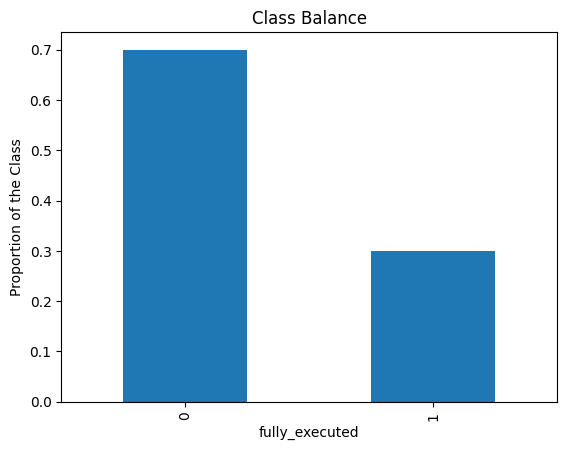

In [41]:
df['fully_executed'].value_counts(normalize=True).plot(kind ='bar')
plt.ylabel('Proportion of the Class')
plt.title('Class Balance');

In [33]:
majority_class, minority_class = df['fully_executed'].value_counts(normalize=True)
majority_class

0.7000368974514403

In [29]:
df.head()

,Class,Adm1,Econ0,function1,fund_source,Estimates,Revised,fully_executed
0,Development,Central,Expenditures,agriculture and rural development,domestic resources,18318600.0,14062700.0,0
1,Development,Central,Expenditures,agriculture and rural development,domestic resources,12799450.0,9599587.0,0
2,Development,Central,Expenditures,agriculture and rural development,domestic resources,7218400.0,5652150.0,0
3,Development,Central,Expenditures,agriculture and rural development,domestic resources,10025827.0,8126744.0,0
4,Development,Central,Expenditures,agriculture and rural development,domestic resources,500000.0,1130625.0,0


In [31]:
#split data into features and target
X = df.drop('fully_executed', axis=1)
print('This is feature matrix', X.shape)
y = df['fully_executed']
print('Target vector', y.shape)


This is feature matrix (75886, 7)
Target vector (75886,)
